## Import File and Create Column GDP

In [92]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
# df=pd.read_csv('./monthly-sunspots.txt')
df = pd.read_csv('./AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df['GDP'] =  [round(random.uniform(3,7),2) for _ in range(144)]
df.columns = ['Month','Passenger','GDP']
df.head()

,Month,Passenger,GDP
0,1949-01-01,112,3.25
1,1949-02-01,118,5.29
2,1949-03-01,132,6.28
3,1949-04-01,129,4.71
4,1949-05-01,121,4.00


## Line Plot for Passenger

Text(0,0.5,'Passengers')

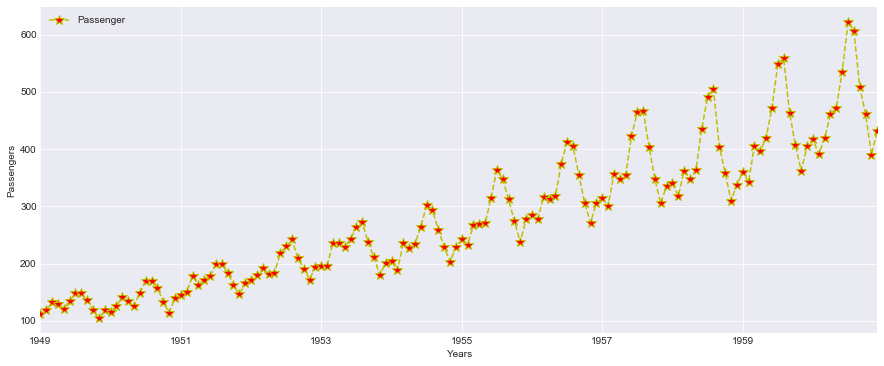

In [93]:
df.plot(x='Month',y='Passenger',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('Years')
plt.ylabel('Passengers')

## Line Plot for GDP

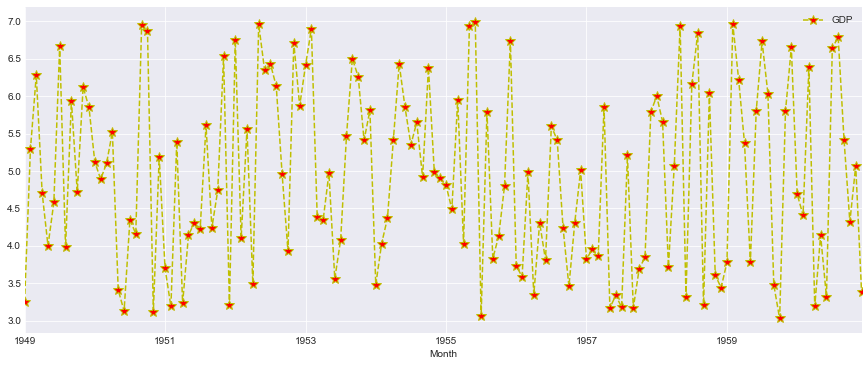

In [94]:
df.plot(x='Month',y='GDP',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

## Quaterly Data Plot by Resampling method

In [95]:
# Resample Yearly
df1 =df.set_index('Month').resample('3M').mean()
df1.head()

,Passenger,GDP
Month,,
1949-01-31,112.000000,3.250000
1949-04-30,126.333333,5.426667
1949-07-31,134.666667,5.083333
1949-10-31,134.333333,4.880000
1950-01-31,112.333333,5.696667


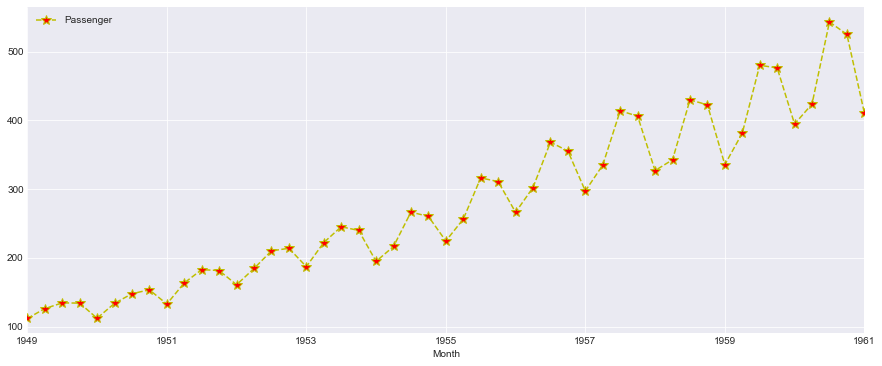

In [96]:
df1.reset_index().plot(x='Month',y='Passenger',figsize=(15,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)

## Scatter Matrix

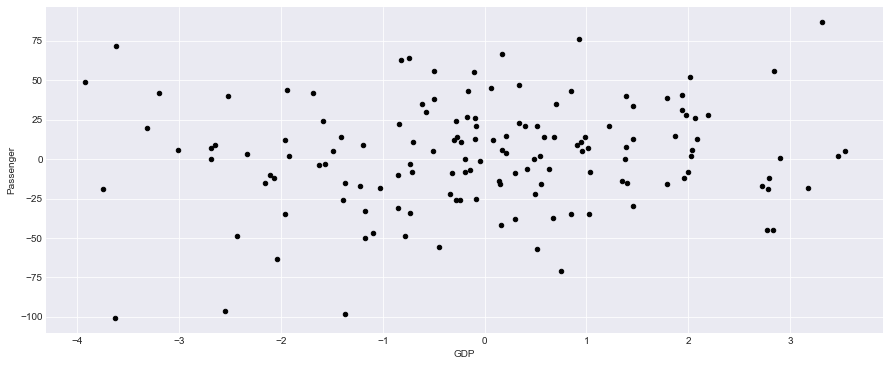

In [97]:
df.diff().plot(figsize=(15,6),kind='scatter',x = 'GDP', y = 'Passenger',color='black')

## Vertical Line Graph

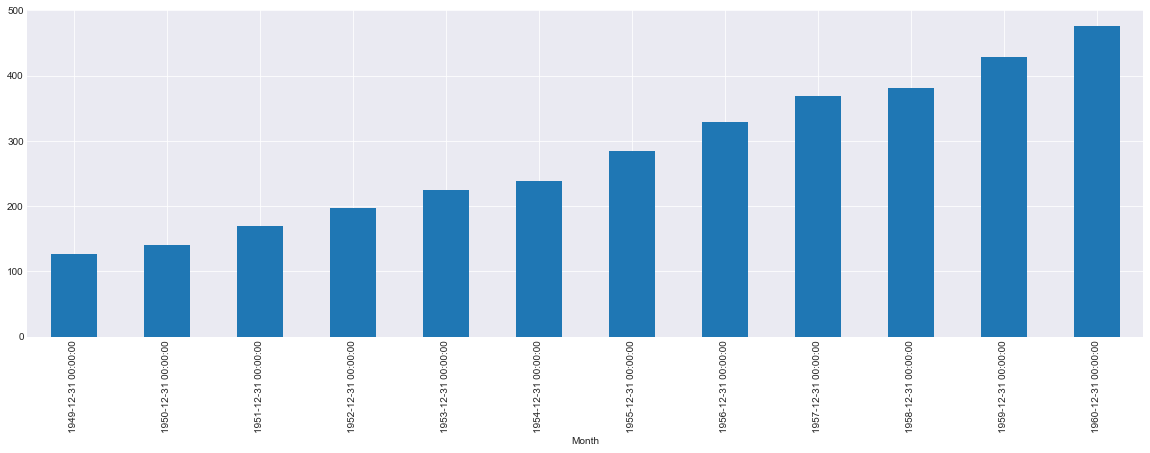

In [98]:
df2 =df.set_index('Month').resample('Y').mean()
df2.Passenger.plot(figsize=(20,6),kind='bar')

## Lag Plot

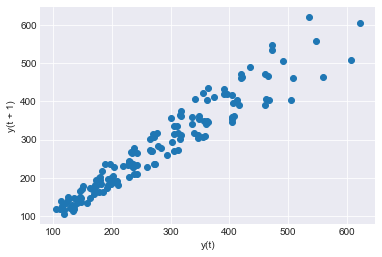

In [99]:
# Lag Plot
pd.plotting.lag_plot(df['Passenger'])

## Create Year and Month Columns

In [100]:
df['Year']=df['Month'].dt.year
df['Month_name']=df['Month'].dt.month

## Heatmap and Hexbin Plots

(array([[21.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  4.,  6.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  3.,  5.,  3.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  5.,  4.,  3.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  6.,  1.,  2.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  6.,  2.,  1.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  3.,  6.,  7.,  3.,  3.,  2.]]),
 array([1949. , 1950.1, 1951.2, 1952.3, 1953.4, 1954.5, 1955.6, 1956.7,
        1957.8, 1958.9, 1960. ]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <matplotlib.image.AxesImage at 0x1103dbc2eb8>)

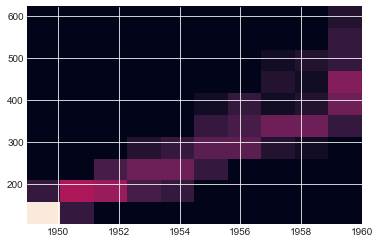

In [101]:
x=df['Year']
y=df['Passenger']
plt.hist2d(x, y)

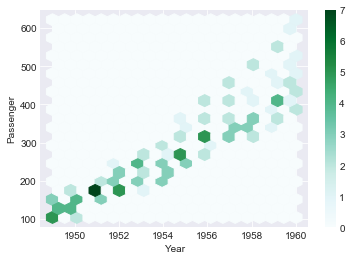

In [102]:
ax = df.plot.hexbin(x='Year', y='Passenger', gridsize=20)

## 3D Visualization of Time Series Plot

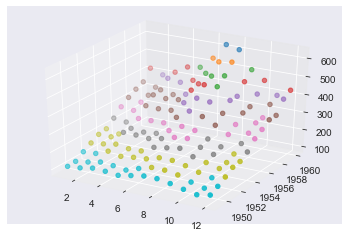

In [103]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ydata = df['Year']
xdata = df['Month_name']
zdata = df['Passenger']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Vega10_r');

## Moving Average and Exponential Weighted Moving Average

In [104]:
# Rolling Mean
df['rolling_mean']=df['Passenger'].rolling(3).mean()
df['EWM_ALPHA_06'] = df['Passenger'].ewm(alpha=0.6).mean()
df.head()

,Month,Passenger,GDP,Year,Month_name,rolling_mean,EWM_ALPHA_06
0,1949-01-01,112,3.25,1949,1,NaN,112.000000
1,1949-02-01,118,5.29,1949,2,NaN,116.285714
2,1949-03-01,132,6.28,1949,3,120.666667,126.358974
3,1949-04-01,129,4.71,1949,4,126.333333,127.985222
4,1949-05-01,121,4.00,1949,5,127.333333,123.750727


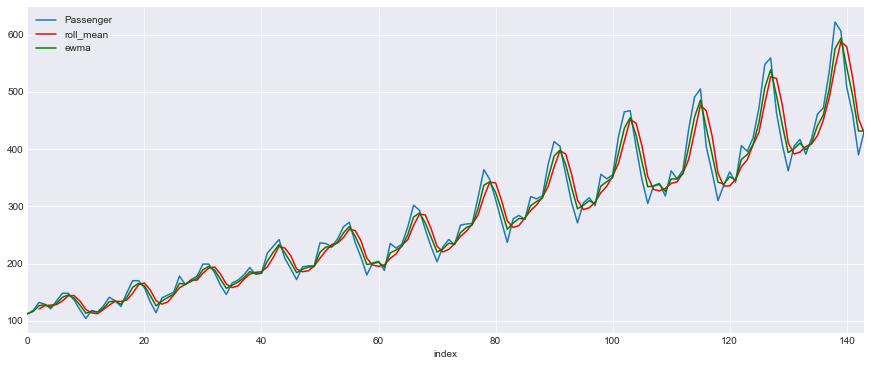

In [105]:
df.reset_index().plot(figsize=(15,6),kind='line',x = 'index', y = 'Passenger')
plt.grid(True)
plt.plot(df['rolling_mean'],label='roll_mean',color='r')
plt.plot(df['EWM_ALPHA_06'],label='ewma',color='g')
plt.legend(loc=2)
plt.show()

## Box and Whisker Plot

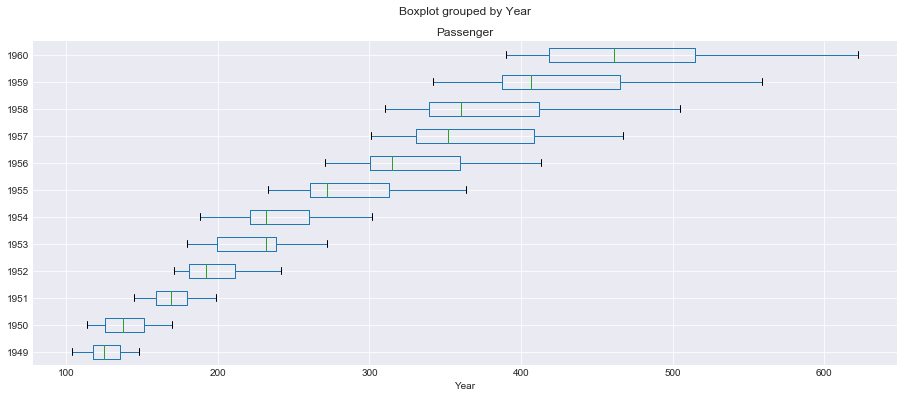

In [106]:
df.boxplot(figsize=(15,6),by='Year',column='Passenger',vert=False)

## Seasonality and Trends

### Per Year Month on Month Count

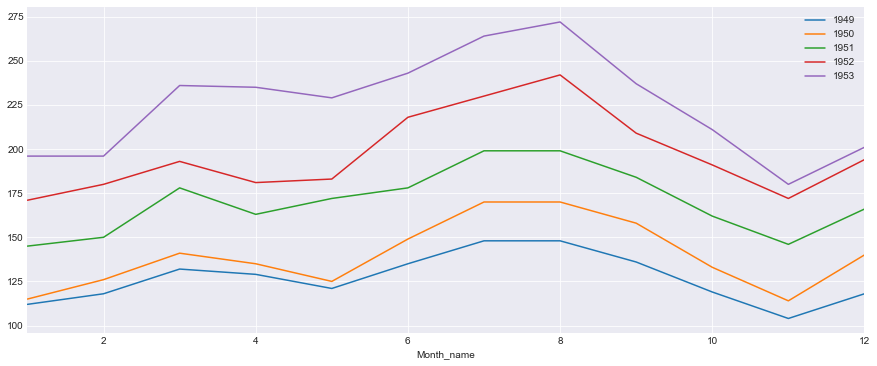

In [107]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in df[:60].groupby('Year'):
    group.plot(x='Month_name',y='Passenger', ax=ax, label=name)

plt.show()

### Per Month of Years on Years Plot

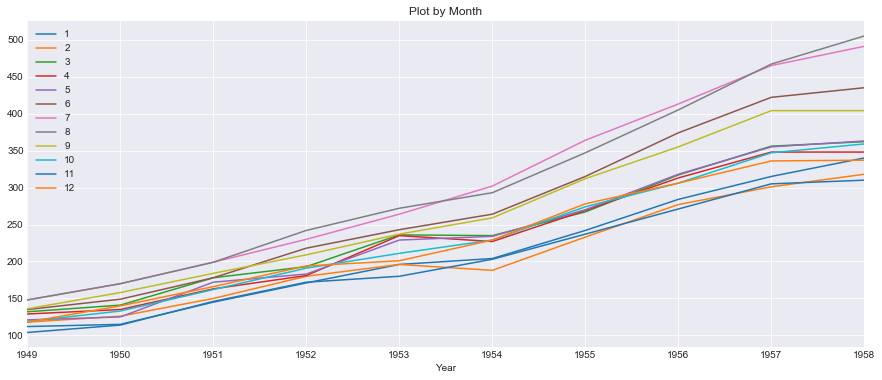

In [108]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in df[:120].groupby('Month_name'):
    group.plot(x='Year',y='Passenger', ax=ax, label=name,title='Plot by Month')
    
plt.show()

## Autocorrelation (ACF) and PACF

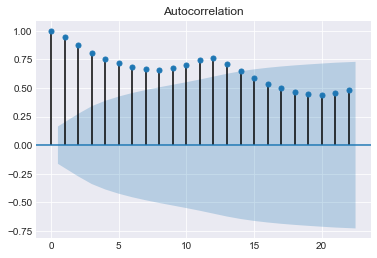

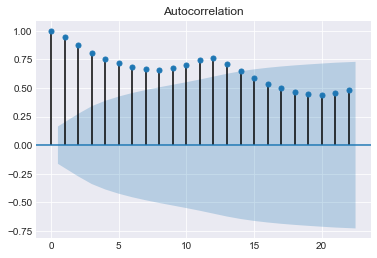

In [109]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df.Passenger)

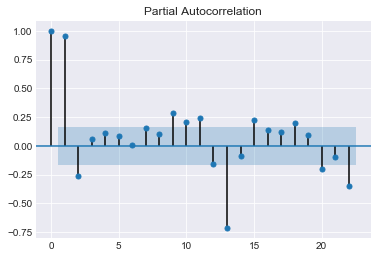

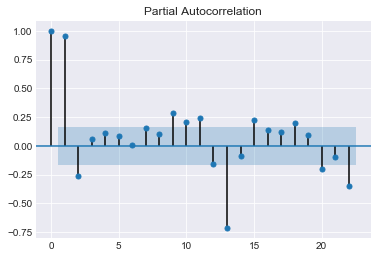

In [110]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df.Passenger)